<a href="https://colab.research.google.com/github/MeghaUkkali9/Advanced-Machine-Learing/blob/master/Project4_MeghaUkkali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Project*#: 4
Name: Megha Ukkali
Course: Advanced Machine Learning
Submission Date: 02/19/2020

In this assignment, you will be performing experiments involving regression using the Beijing PM2.5 Data Set:

The hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.
PM2. 5 refers to atmospheric particulate matter (PM) that have a diameter of less than 2.5 micrometers, which is about 3% the diameter of a human hair.
Commonly written as PM2.5, particles in this category are so small that they can only be detected with an electron microscope.
The data set can be found in the UCI Repository:  https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data (Links to an external site.)

Your task is to create a well-documented report using a Google Colab Jupyter notebook to:

Perform data scrubbing (handle missing data, normalization, scaling, etc.)
Perform linear as well as non-linear regression on the dataset 
Evaluate the performance of  each model using k-fold cross validation
Plot and compare learning curves for all models 
Fully discuss which model performs the best and why
 

[Source: https://royalsocietypublishing.org/doi/full/10.1098/rspa.2015.0257] (Links to an external site.)

 

 

Upload the PRSAdata from the git hub

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
import os
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/MeghaUkkali9/Advanced-Machine-Learing/master/"
PRSA_PATH = os.path.join("datasets", "PRSA")
PRSA_URL = DOWNLOAD_ROOT + "datasets/PRSA/PRSA_data_2010.1.1-2014.12.31.csv"

def fetch_prsadata_data(prsadata_url=PRSA_URL, prsadata_path=PRSA_PATH):
    if not os.path.isdir(prsadata_path):
        os.makedirs(prsadata_path)
    tgz_path = os.path.join(prsadata_path, "PRSA_data_2010.1.1-2014.12.31.csv")
    urllib.request.urlretrieve(prsadata_url, tgz_path)

In [0]:
fetch_prsadata_data()

# Import Dataset

Load the .csv file of prsa dataset. This prsadata contains the total 43824 rows. There are 13 features in this dataset.
The information in this dataset is collected from 2010 to 2014 yr.

In [0]:
import pandas as pd

def load_prsadata_data(prsadata_path=PRSA_PATH):
    csv_path = os.path.join(prsadata_path, "PRSA_data_2010.1.1-2014.12.31.csv")
    return pd.read_csv(csv_path)

# Explore Dataset

Explore the dataset by using head(), describe()

In [6]:
prsadata = load_prsadata_data()
prsadata.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [7]:
prsadata.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [8]:
prsadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
prsadata.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


Dropping the number feature. This is not neccessary for predicting PM2.5.

In [0]:
prsadata=prsadata.drop("No", axis=1)

# The classification data for each attribute.

Plotting the classification data using matplotlib

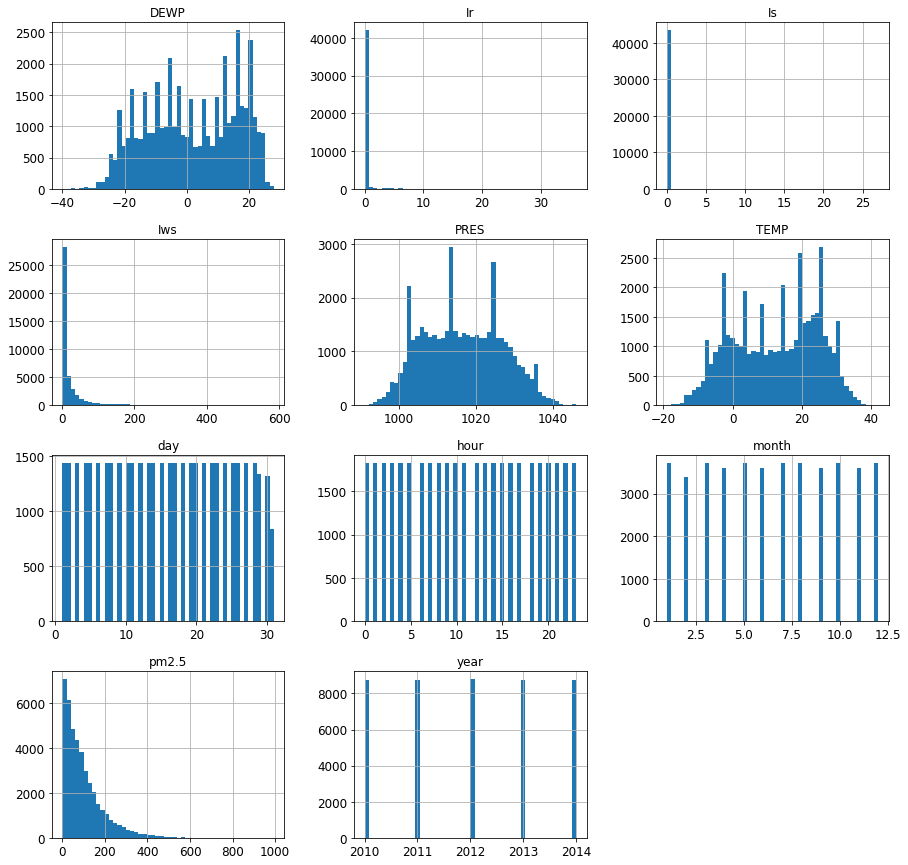

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
prsadata.hist(bins=50, figsize=(15,15))
plt.show()

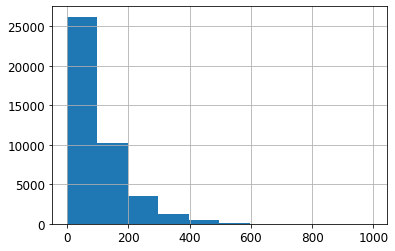

In [12]:
prsadata["pm2.5"].hist()


In [13]:
prsadata["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

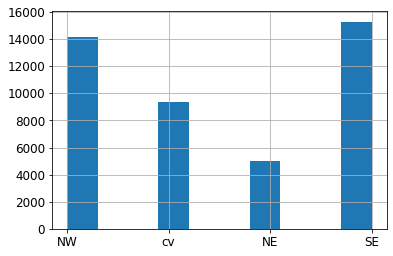

In [14]:
prsadata["cbwd"].hist()

The string feature is encoded into number using LabelEncoder().

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
prsadata['cbwd'] = encoder.fit_transform(prsadata['cbwd'].astype('str')) 
prsadata.head()


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,1,12.97,0,0


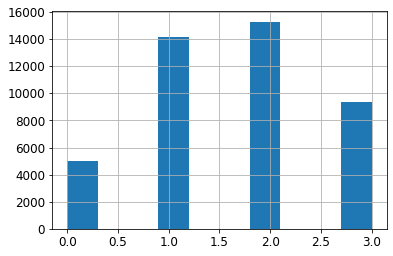

In [16]:
prsadata["cbwd"].hist()

#Data Scrubbing

Data Scrubbing is very important because data set contains the missing value. Missing values lead model to learn poorly.

Missing values are handled by filling mean value

In [0]:
median = prsadata["pm2.5"].median()
prsadata["pm2.5"].fillna(median, inplace=True) 

In [18]:
prsadata.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448521,1016.447654,1.663267,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198613,10.268698,0.937981,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


In [19]:
prsadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    43824 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null int64
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8)
memory usage: 4.0 MB


In [20]:
prsadata.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [21]:
prsadata.isnull().values.any()

False

In [22]:
prsadata[prsadata["pm2.5"].isnull()]

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir


In [23]:
prsadata.shape

(43824, 12)

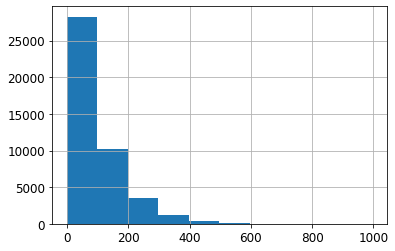

In [24]:
prsadata["pm2.5"].hist()

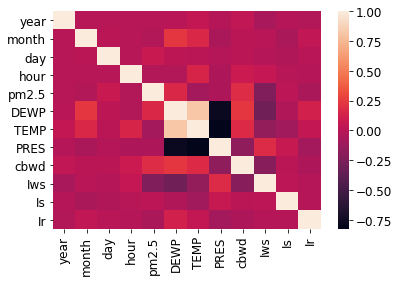

In [25]:
import seaborn as sns
corr = prsadata.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
corr_matrix = prsadata.corr()

In [0]:
The below result shows that pm2.5 feature is highly correlated with cbwd, DEWP.

In [78]:
corr_matrix["pm2.5"].sort_values(ascending=False)

pm2.5    1.000000
cbwd     0.192094
DEWP     0.165696
day      0.079172
Is       0.020192
year    -0.005805
hour    -0.022435
month   -0.024286
PRES    -0.046337
Ir      -0.050135
TEMP    -0.089115
Iws     -0.239623
Name: pm2.5, dtype: float64

# VISUALIZING FEATURE

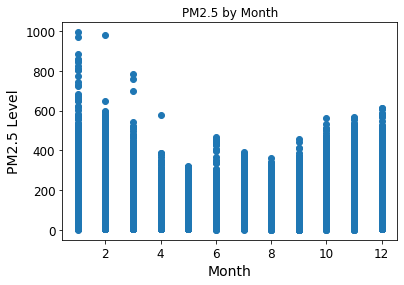

In [64]:
x = prsadata['month']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

Winter months have a much larger variation in pollution levels, including some very high levels.

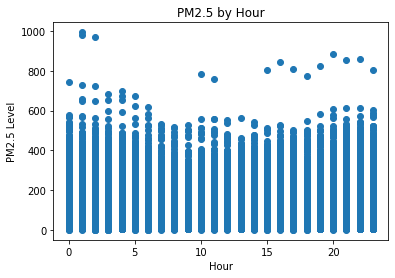

In [32]:
x = prsadata['hour']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

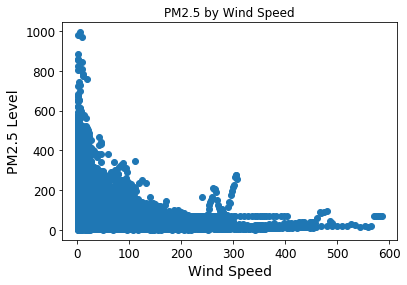

In [29]:
x = prsadata['Iws']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Wind Speed')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Wind Speed')
plt.show()

There is drop in the PM2.5 levels at higher snow. I think snow may be a good feature to predict PM2.5



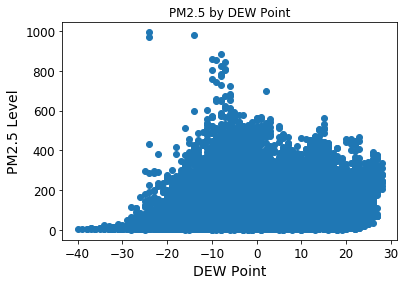

In [30]:
x = prsadata['DEWP']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('DEW Point')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by DEW Point')
plt.show()

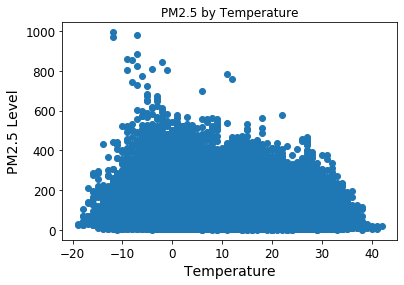

In [31]:
x = prsadata['TEMP']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature')
plt.show()

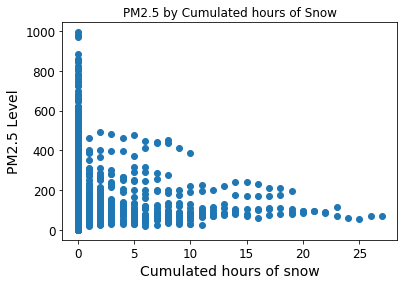

In [32]:
x = prsadata['Is']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Cumulated hours of snow')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Cumulated hours of Snow')
plt.show()

There is drop in the PM2.5 levels at higher snow. I think snow may be a good feature.

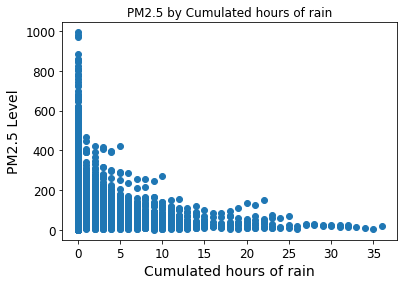

In [33]:
x = prsadata['Ir']
y = prsadata['pm2.5']
plt.scatter(x,y)
plt.xlabel('Cumulated hours of rain')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Cumulated hours of rain')
plt.show()

There is drop in the PM2.5 levels at higher rain. It seems rain may be a good feature.

There are spikes which are seen at all times of day that have a high variance. This does not seem predictive.
Winter months are a large predictor for PM2.5level. Month is also a good predictor.
It is clear that at higher windspeed,rain,and snow lower the PM2.5 level. Wind speed,rain and snow are a good predictor.




# Split dataset

In [0]:
# to make this notebook's output identical at every run
import numpy as np

np.random.seed(42)

In [0]:
X_data = prsadata.drop("pm2.5", axis=1) 
y_data = prsadata["pm2.5"].copy()

In [28]:
X_data

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,-21,-11.0,1021.0,1,1.79,0,0
1,2010,1,1,1,-21,-12.0,1020.0,1,4.92,0,0
2,2010,1,1,2,-21,-11.0,1019.0,1,6.71,0,0
3,2010,1,1,3,-21,-14.0,1019.0,1,9.84,0,0
4,2010,1,1,4,-20,-12.0,1018.0,1,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,-23,-2.0,1034.0,1,231.97,0,0
43820,2014,12,31,20,-22,-3.0,1034.0,1,237.78,0,0
43821,2014,12,31,21,-22,-3.0,1034.0,1,242.70,0,0
43822,2014,12,31,22,-22,-4.0,1034.0,1,246.72,0,0


In [29]:
y_data

0        72.0
1        72.0
2        72.0
3        72.0
4        72.0
         ... 
43819     8.0
43820    10.0
43821    10.0
43822     8.0
43823    12.0
Name: pm2.5, Length: 43824, dtype: float64

In [30]:
X_data.columns

Index(['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws',
       'Is', 'Ir'],
      dtype='object')

In [31]:
X_data.shape

(43824, 11)

In [32]:
y_data.shape

(43824,)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [34]:
len(X_train)

35059

In [35]:
len(X_test)

8765

In [36]:
X_train.head()

,year,month,day,hour,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
6670,2010,10,5,22,13,16.0,1013.0,2,1.79,0,0
23445,2012,9,3,21,8,16.0,1015.0,1,66.15,0,0
24928,2012,11,4,16,0,4.0,1013.0,1,200.74,0,31
1588,2010,3,8,4,-5,-4.0,1038.0,2,10.29,3,0
9737,2011,2,10,17,-4,-3.0,1027.0,2,87.19,19,0


**Prepare the data for Machine Learning algorithms**

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [33]:
X_train_reduced.shape

(35059, 3)

In [0]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [35]:
d

3

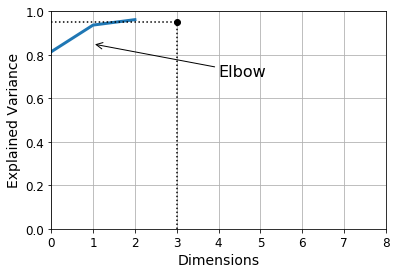

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(1, 0.85), xytext=(4, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

In [142]:
np.sum(pca.explained_variance_ratio_)

0.9618904263828616

# Linear regression using the Normal Equation

In [0]:
import numpy as np

X = X_train["DEWP"]
y = y_train

Saving figure generated_data_plot


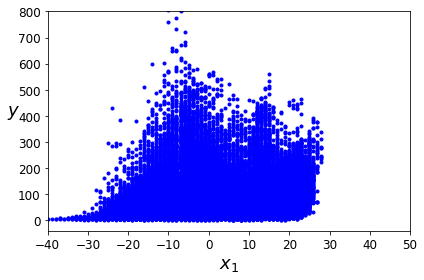

In [29]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-40, 50, -40, 800])
save_fig("generated_data_plot")
plt.show()

In [0]:
X_b = np.c_[np.ones((35059, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [33]:
X_b

array([[  1.,  13.],
       [  1.,   8.],
       [  1.,   0.],
       ...,
       [  1.,   5.],
       [  1., -13.],
       [  1.,   9.]])

In [0]:
X_test1 = X_test["DEWP"]

In [54]:
X_new_b = np.c_[np.ones((8765, 1)), X_test1]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([115.2567598 ,  85.01633229,  75.63137202, ...,  71.46027857,
        86.05910565, 103.78625281])

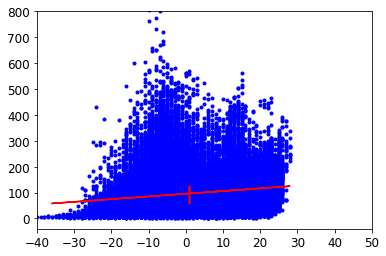

In [41]:
plt.plot(X, y, "b.")
plt.plot(X_new_b, y_predict, "r-")
plt.axis([-40, 50, -40, 800])
plt.show()

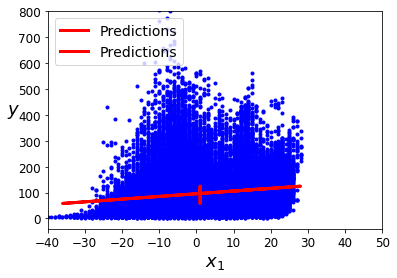

In [45]:
plt.plot(X, y, "b.")
plt.plot(X_new_b, y_predict, "r-", linewidth=3, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-40, 50, -40, 800])
plt.show()

#Linear Regression

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regressor = LinearRegression()
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
regressor.intercept_, regressor.coef_

(-333.74480012317315,
 array([ 0.95630202, -1.4286669 ,  0.68022483,  1.44368993,  4.36404426,
        -6.2262814 , -1.42969016, 11.00347893, -0.21075673, -2.99350227,
        -6.63668283]))

In [0]:
# Make predictions using the testing set
lin_pred = regressor.predict(X_test)

In [78]:
linear_regression_score = regressor.score(X_test, y_test)
linear_regression_score

0.2545974516973225

After applying scaling to Linear

In [79]:
regressor.fit(X_train_scaled, y_train)
lin_pred_sc=regressor.predict(X_test)
regressor.score(X_test, y_test)

-21607.325568550124

In [80]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

77.07947712845619

In [81]:
print("Root Mean Squared Error(RMSE) : ", lin_rmse)
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test, lin_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, lin_pred))
print("R-squared:", r2_score(y_test, lin_pred))

Root Mean Squared Error(RMSE) :  77.07947712845619
Mean Absolute Error(MAE) :  56.048105361124634
Mean Squred Error(MSE) :  5941.245794396202
R-squared: 0.2545974516973225


In [82]:
import pandas as pd

coef = pd.DataFrame(regressor.coef_, X_data.columns, columns=['Coefficient'])
coef

,Coefficient
year,1.350833
month,-4.931295
day,5.984777
hour,9.976610
DEWP,63.124020
TEMP,-76.045090
PRES,-14.687136
cbwd,10.346989
Iws,-10.513228
Is,-2.212683


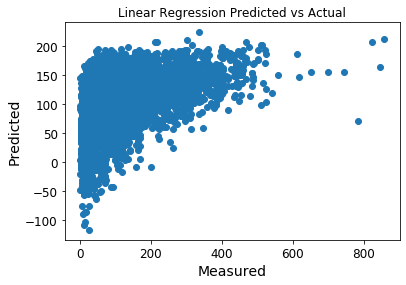

In [83]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [59]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([95.44406591,  1.04277336])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [60]:
np.linalg.pinv(X_b).dot(y)

array([95.44406591,  1.04277336])

Cross validation for Linear Regression

In [93]:
from sklearn.model_selection import cross_val_predict

y_train_pred_sc = cross_val_predict(regressor, X_train, y_train, cv=3)
y_train_pred_sc

array([ 140.27258418,   92.06142286, -121.71375113, ...,   95.00078816,
        139.95284992,  129.25863448])

In [87]:

regressor.fit(X_train_scaled, y_train)
regressor_lin_pred_sc=regressor.predict(X_test)
regressor.score(X_test, y_test)

-21607.325568550124

In [0]:
print("scores:", scores_knn)
print("Mean:",scores_knn.mean())

# Stochastic Gradient Descent


In [0]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train.ravel())
sgd_reg_pred = sgd_reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

sgd_reg_mse = mean_squared_error(y_test, sgd_reg_pred)
sgd_reg_rmse = np.sqrt(sgd_reg_mse)


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Root Mean Squared Error:",sgd_reg_rmse)
print("Mean Absolute Error:", mean_absolute_error(y_test, sgd_reg_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, sgd_reg_pred))
print("R-squared:", r2_score(y_test, sgd_reg_pred))

Root Mean Squared Error: 1219472180737909.2
Mean Absolute Error: 1218171882566919.8
Mean Squred Error(MSE) :  1.4871123995936723e+30
R-squared: -1.8657658858604543e+26


In [67]:
sgd_reg.intercept_, sgd_reg.coef_

(array([8.44433648e+08]),
 array([ 1.30295713e+12,  4.90056036e+11, -2.24369769e+12,  1.31021826e+12,
         6.40880260e+11,  2.18803746e+12, -1.38632724e+12,  3.37574860e+11,
        -2.68885838e+11,  1.06047607e+11, -6.81280975e+10]))

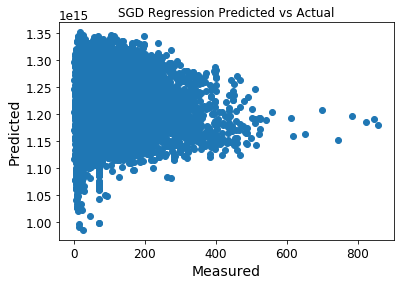

In [73]:
plt.scatter(y_test, sgd_reg_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('SGD Regression Predicted vs Actual')
plt.show()

# Lasso Regression

In [95]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
lasso_score = lasso_reg.score(X_test, y_test)
lasso_score

0.25467760417582863

In [0]:
# Make predictions using the testing set
lasso_pred = lasso_reg.predict(X_test)

In [98]:
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mse_lasso)

print("Root Mean Squared Error:",rmse_lasso)
print("Mean Absolute Error:", mean_absolute_error(y_test, lasso_pred))

Root Mean Squared Error: 77.07533287295391
Mean Absolute Error: 56.04520017117027


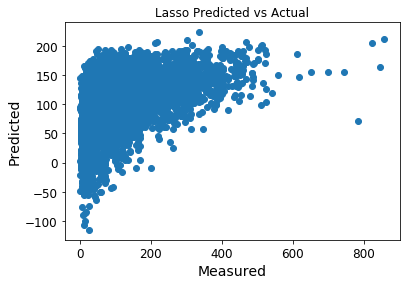

In [99]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

Applying scaling 

In [63]:
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_pred_sc=lasso_reg.predict(X_test)
lasso_reg.score(X_test, y_test)

-20949.320469068833

In [100]:
from sklearn.model_selection import cross_val_predict

y_train_pred_sc = cross_val_predict(lasso_reg, X_train, y_train, cv=3)
y_train_pred_sc

array([ 140.30833568,   92.0946762 , -120.1218532 , ...,   94.80565503,
        139.90161455,  129.38543009])

# Elastic Net Regression

In [101]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
elasticnet_score = elasticnet_reg.score(X_test, y_test)
elasticnet_score

0.2548335290863256

In [0]:
elasticnet_pred = elasticnet_reg.predict(X_test)

In [104]:
mse_elasticnet = mean_squared_error(y_test, elasticnet_pred)
rmse_elasticnet = np.sqrt(mse_elasticnet)

print("Root Mean Squared Error:", rmse_elasticnet)
print("Mean Absolute Error:", mean_absolute_error(y_test, elasticnet_pred))

Root Mean Squared Error: 77.06727019224934
Mean Absolute Error: 56.04287832582857


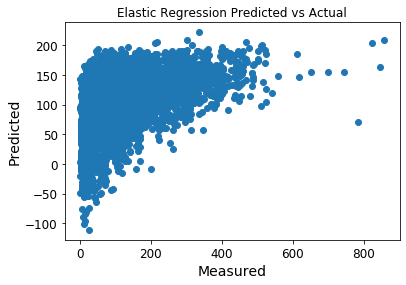

In [68]:
plt.scatter(y_test, elasticnet_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Elastic Regression Predicted vs Actual')
plt.show()

After Applying Scaling 

In [105]:
elasticnet_reg.fit(X_train_scaled, y_train)
elasticnet_reg_pred_sc=elasticnet_reg.predict(X_test)
elasticnet_reg.score(X_test, y_test)

-11847.675680895993

In [106]:
from sklearn.model_selection import cross_val_predict

y_train_pred_sc = cross_val_predict(elasticnet_reg, X_train, y_train, cv=3)
y_train_pred_sc

array([ 140.11804939,   92.35919283, -115.67164663, ...,   94.60950056,
        139.55991336,  129.70314272])

# Random Forest Regression

In [107]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [71]:
rnd_clf_score = rnd_clf.score(X_test, y_test)
rnd_clf_score

0.8353029015260123

In [0]:
rnd_clf_pred = rnd_clf.predict(X_test)

In [73]:
mse_rnd = mean_squared_error(y_test, rnd_clf_pred)
rmse_rnd = np.sqrt(mse_rnd)
print("Root Mean Squared Error:",rmse_rnd)
print("Mean Absolute Error:", mean_absolute_error(y_test, rnd_clf_pred))
# variance score: 1 is perfect prediction
print("R-squared:", r2_score(y_test, rnd_clf_pred))

Root Mean Squared Error: 36.23149858523503
Mean Absolute Error: 22.337895037079292
R-squared: 0.8353029015260123


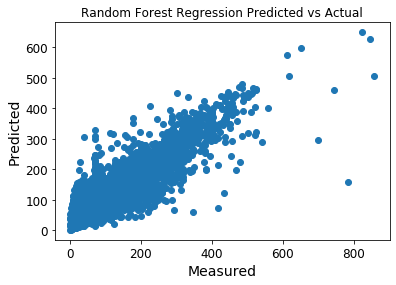

In [74]:
plt.scatter(y_test, rnd_clf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Predicted vs Actual')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sc = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
y_train_pred_sc

In [83]:
rnd_clf.fit(X_train_scaled, y_train)
rnd_clf_pred_sc=rnd_clf.predict(X_test)
rnd_clf.score(X_test, y_test)


-1.6141703588345648

In [86]:
from sklearn.model_selection import cross_val_score
scale_scores = cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

ValueError: ignored

# Polynomial regression

In [0]:
import numpy as np

np.random.seed(42)

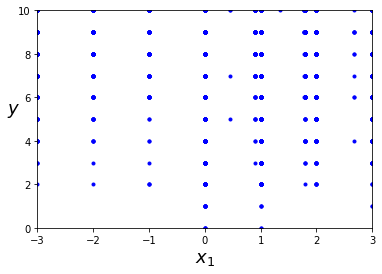

In [124]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [0]:
X_poly = poly_features.fit_transform(X_train)

In [155]:
X_poly[0]

array([2.010000e+03, 1.000000e+01, 5.000000e+00, 2.200000e+01,
       1.300000e+01, 1.600000e+01, 1.013000e+03, 2.000000e+00,
       1.790000e+00, 0.000000e+00, 0.000000e+00, 4.040100e+06,
       2.010000e+04, 1.005000e+04, 4.422000e+04, 2.613000e+04,
       3.216000e+04, 2.036130e+06, 4.020000e+03, 3.597900e+03,
       0.000000e+00, 0.000000e+00, 1.000000e+02, 5.000000e+01,
       2.200000e+02, 1.300000e+02, 1.600000e+02, 1.013000e+04,
       2.000000e+01, 1.790000e+01, 0.000000e+00, 0.000000e+00,
       2.500000e+01, 1.100000e+02, 6.500000e+01, 8.000000e+01,
       5.065000e+03, 1.000000e+01, 8.950000e+00, 0.000000e+00,
       0.000000e+00, 4.840000e+02, 2.860000e+02, 3.520000e+02,
       2.228600e+04, 4.400000e+01, 3.938000e+01, 0.000000e+00,
       0.000000e+00, 1.690000e+02, 2.080000e+02, 1.316900e+04,
       2.600000e+01, 2.327000e+01, 0.000000e+00, 0.000000e+00,
       2.560000e+02, 1.620800e+04, 3.200000e+01, 2.864000e+01,
       0.000000e+00, 0.000000e+00, 1.026169e+06, 2.0260

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

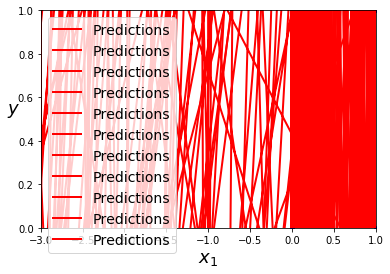

In [157]:
X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_test, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 1, 0, 1])
plt.show()

#Learning Curve

In [0]:
Corr_X = prsadata['DEWP']
Corr_y = prsadata["pm2.5"]

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)   

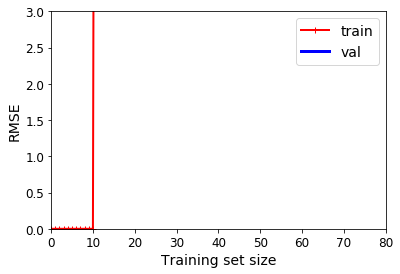

In [112]:
plot_learning_curves(regressor, X_data, y_data)
plt.axis([0, 800, 0, 300])                         # not shown in the book
plt.show()   

In [113]:
plot_learning_curves(sgd_reg, X_data, y_data)
plt.axis([0, 800, 0, 3000])                         # not shown in the book
plt.show()  

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.102350780532764, tolerance: 0.8978
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.756146169845373, tolerance: 9.346866666666667
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.363949511938948, tolerance: 11.480500000000001


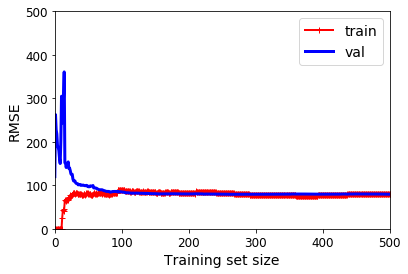

In [116]:
plot_learning_curves(lasso_reg, X_data, y_data)
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show() 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9678301616182794, tolerance: 0.8978
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.390607176193363, tolerance: 9.346866666666667
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.050085442065392, tolerance: 11.480500000000001

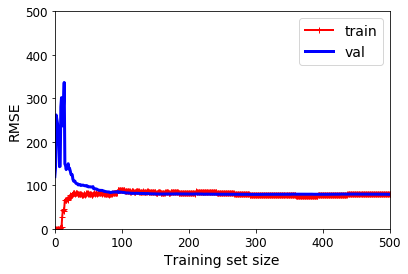

In [117]:
plot_learning_curves(elasticnet_reg, X_data, y_data)
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show() 

In [0]:
plot_learning_curves(rnd_clf, X_data, y_data)
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show() 

In [0]:
plot_learning_curves(ridge_reg, X_data, y_data)
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show() 

In [0]:
plot_learning_curves(decision_tree, X_data, y_data)
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show() 

plot_learning_curves(rnd_clf, X_data, y_data)
plt.axis([0, 500, 0, 500])                         # not shown in the book
plt.show() 

#Rigid Regression

In [0]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [27]:
ridge_pred

array([130.65314728, 113.38740222, 129.09618832, ...,  67.41991153,
       106.84266503, 115.00614302])

In [31]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_reg.predict(X_test)

array([130.54823289, 113.30275234, 129.11020504, ...,  67.4358669 ,
       106.96364698, 115.06699175])

In [33]:
from sklearn.metrics import mean_squared_error

rigid_mse = mean_squared_error(y_test, ridge_pred)
rigid_rmse = np.sqrt(rigid_mse)
rigid_rmse

77.07946882799365

In [34]:
print("Root Mean Squared Error(RMSE) : ", rigid_rmse)
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test, ridge_pred))
print("Mean Squred Error(MSE) : ", mean_squared_error(y_test, ridge_pred))
print("R-squared:", r2_score(y_test, ridge_pred))

Root Mean Squared Error(RMSE) :  77.07946882799365
Mean Absolute Error(MAE) :  56.04810243780867
Mean Squred Error(MSE) :  5941.244514805645
R-squared: 0.2545976122377369


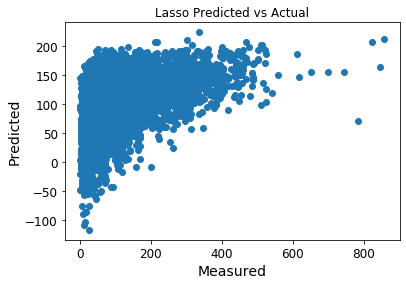

In [35]:
plt.scatter(y_test, ridge_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()

Train the model using the training sets

In [0]:
decision_tree.fit(X_train, y_train)

In [0]:
decision_tree_score = decision_tree.score(X_test, y_test)
decision_tree_score

In [0]:
decision_tree_pred = decision_tree.predict(X_test)

In [0]:

mse_rnd = mean_squared_error(y_test, decision_tree_pred)
rmse_rnd = np.sqrt(mse_rnd)
print("Root Mean Squared Error:",rmse_rnd)
print("Mean Absolute Error:", mean_absolute_error(y_test, decision_tree_pred))
# variance score: 1 is perfect prediction
print("R-squared:", r2_score(y_test, decision_tree_pred))

In [0]:
plt.scatter(y_test, decision_tree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression Predicted vs Actual')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred_sc = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
y_train_pred_sc

In [0]:
.fit(X_train_scaled, y_train)
decision_tree_pred_sc=decision_tree.predict(X_test)
decision_tree.score(X_test, y_test)

#Report
The PRSA data contains 13 features. There are missing values in the pm2.5 feature.

Missing value is handled using mean(). string feature 'cbwd' is encoded to number using originalEncoder().

Splitted the dataset 80 % training and 20% is for testing set.
Applied Linear Regression, SGD, Lasso, Elastic Net, Random Forest, Polynomial regression, Decision tree, Rigid. 

Evaluated the Performance such as RMSE, MSE, MAE and R2_score.
After looking at performance, Randomforest regreesion is good. 

For Linear Regression:
Root Mean Squared Error(RMSE) :  77.07947712845619
Mean Absolute Error(MAE) :  56.048105361124634
Mean Squred Error(MSE) :  5941.245794396202
R-squared: 0.2545974516973225

For Random Forest Regression: Root Mean Squared Error: 36.23149858523503
Mean Absolute Error: 22.337895037079292
R-squared: 0.8353029015260123

SGD: 
Root Mean Squared Error: 1219472180737909.2
Mean Absolute Error: 1218171882566919.8
Mean Squred Error(MSE) :  1.4871123995936723e+30
R-squared: -1.8657658858604543e+26

Lasso Regression: Root Mean Squared Error: 77.07533287295391
Mean Absolute Error: 56.04520017117027

Elastic Net Regression:
Root Mean Squared Error: 77.06727019224934
Mean Absolute Error: 56.04287832582857

Rigid Regression:
Root Mean Squared Error(RMSE) :  77.07946882799365
Mean Absolute Error(MAE) :  56.04810243780867
Mean Squred Error(MSE) :  5941.244514805645
R-squared: 0.2545976122377369

As we can see that There are high error for regressions such as Linear,  SGD, Lasso, Elastic Net, Rigid.

Random forest has low error. So Random Forest is good for this dataset.

Plotted the learning curve for these models. But for SGD, It was taking too much time so I did not plot learning curve.

